### Lead Score - Case Study

#### Problem Statement
X Education needs help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Goals and Objectives
There are quite a few goals for this case study:-

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.


### Importing Required Libraries

In [1]:

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

### Loading Data

In [2]:
df = pd.read_csv('//Users//abhisheksharma//Desktop//Lead Scoring Assignment//Leads.csv')
df.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspecting Dataset

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.shape


(9240, 37)

### Statistical features checking for given dataset

In [5]:
df.describe()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Checking any duplicate values in dataset

In [6]:
df[df.duplicated(keep=False)]


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


### Cleaning the Dataframe

In [7]:
df = df.applymap(lambda s:s.lower() if type(s) == str else s)


In [8]:
df = df.replace('select',np.nan)


In [9]:
df.nunique()


Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

### Dropping unique valued Columns

In [10]:


df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)


### Check for missing value count

In [11]:
round(100*(df1.isnull().sum()/len(df1.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

### Dropping columns which have more than 30% missing values

In [12]:
# Also dropping prospect ID and Lead number since all rows of these columns are unique so no use of them

df2 = df1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number', 'Specialization', 'Prospect ID'],axis=1)
df2.head()


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [13]:
round(100*(df2.isnull().sum()/len(df2.index)), 2)


Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
A free cop

### Imputing columns which have high % of missing values even after dropping columns having >30% mising values with 'Not Provided'

In [14]:

df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('not provided')
df2['Country'] = df2['Country'].fillna('not provided')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('not provided')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

#### Checking value counts of 'Country'

In [15]:
df2.Country.value_counts()


india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
france                     6
oman                       6
unknown                    5
kuwait                     4
south africa               4
nigeria                    4
canada                     4
germany                    4
sweden                     3
uganda                     2
belgium                    2
netherlands                2
philippines                2
italy                      2
asia/pacific region        2
bangladesh                 2
china                      2
ghana                      2
kenya                      1
denmark                    1
tanzania                   1
sri lanka                  1
indonesia                  1
malaysia      

### Country column is highly skewed so this can be dropped

In [16]:
#highly skewed
df2 = df2.drop(['Country'], axis=1)


In [17]:
round(100*(df2.isnull().sum()/len(df2.index)), 2)


Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
A free copy of Mastering The Interview           0.00
Last Notable Activity       

In [18]:
df2['Lead Source'].value_counts()


google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
live chat               2
social media            2
press_release           2
pay per click ads       1
welearnblog_home        1
testone                 1
welearn                 1
blog                    1
nc_edm                  1
youtubechannel          1
Name: Lead Source, dtype: int64

#### Filling missing values of Lead Source column with its mode

In [19]:
df2['Lead Source'] = df2['Lead Source'].replace(np.nan, 'google')


In [20]:
df2['TotalVisits'].value_counts()


0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

#### Filling missing values of Total Visits column with its median

In [21]:
df2['TotalVisits'] = df2['TotalVisits'].replace(np.nan, df2['TotalVisits'].median())


In [22]:
df2['Page Views Per Visit'].value_counts()


0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

#### Filling missing values of Page Views Per Visit column with its median

In [23]:
df2['Page Views Per Visit'] = df2['Page Views Per Visit'].replace(np.nan, df2['Page Views Per Visit'].median())


In [24]:
df2['Last Activity'].value_counts()


email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
resubscribed to emails             1
visited booth in tradeshow         1
Name: Last Activity, dtype: int64

#### Filling missing values of Last Activity column with 'Not Sure'

In [25]:
df2['Last Activity'] = df2['Last Activity'].replace(np.nan, 'Not Sure')


### Final check for null values in the dataset

In [26]:
round(100*(df2.isnull().sum()/len(df2.index)), 2)


Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
A free copy of Mastering The Interview           0.0
Last Notable Activity                         

In [27]:
df2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   What is your current occupation                9240 

### Univariate Analysis of Categorical Columns

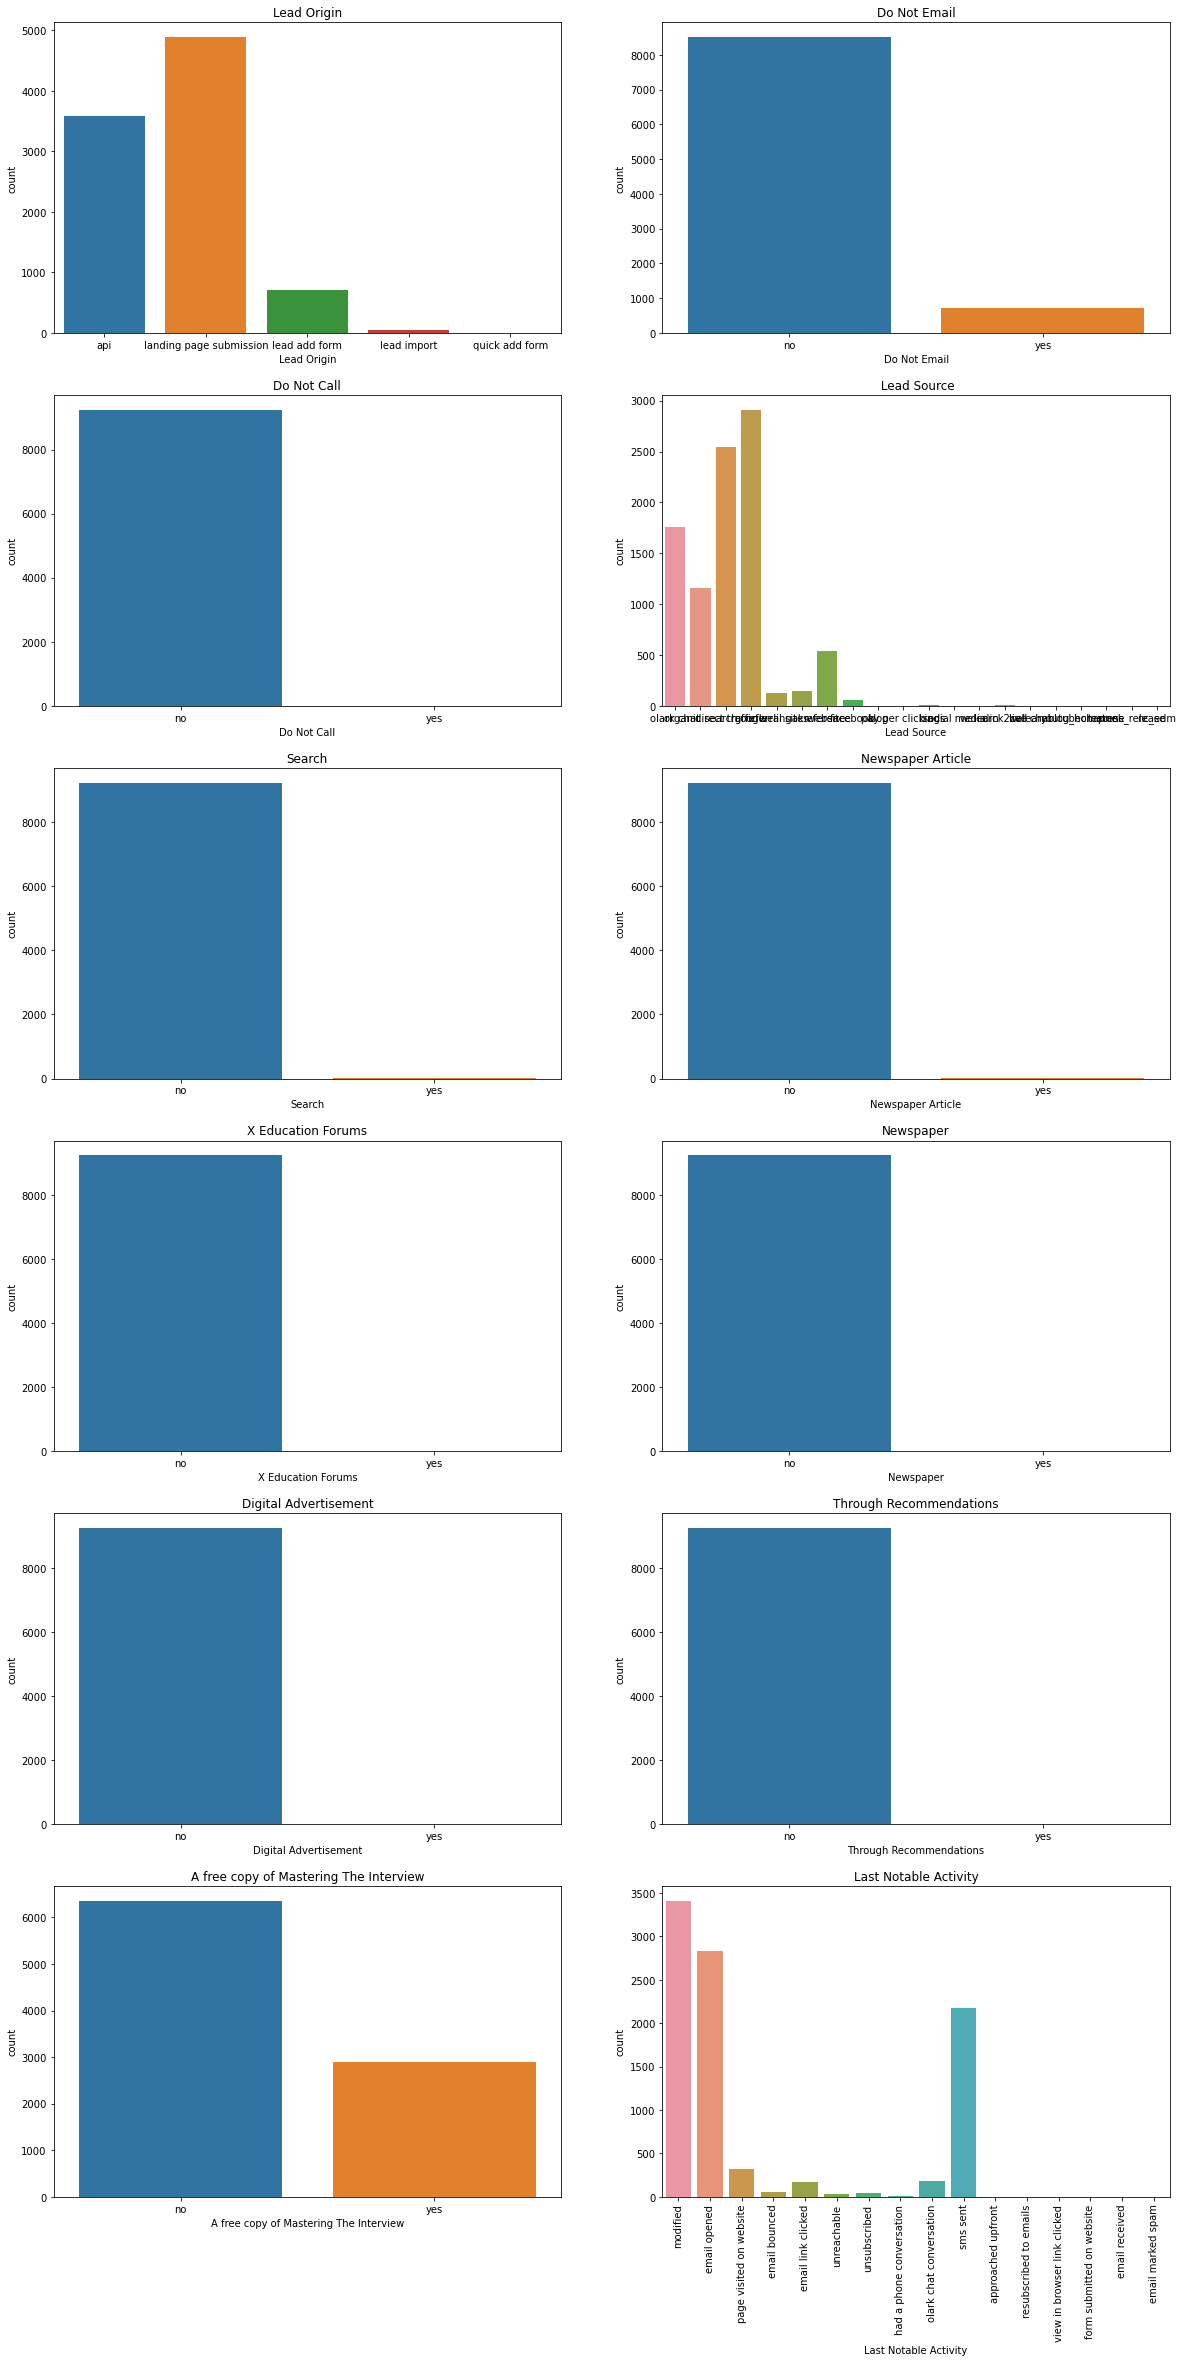

In [29]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df2['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df2['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df2['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df2['Lead Source'])
plt.title(' Lead Source')

plt.subplot(6,2,5)
sns.countplot(df2['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df2['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df2['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df2['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df2['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df2['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df2['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df2['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()


#### Insights

- landing page submission has highest count in lead origin
- Google is the major lead source

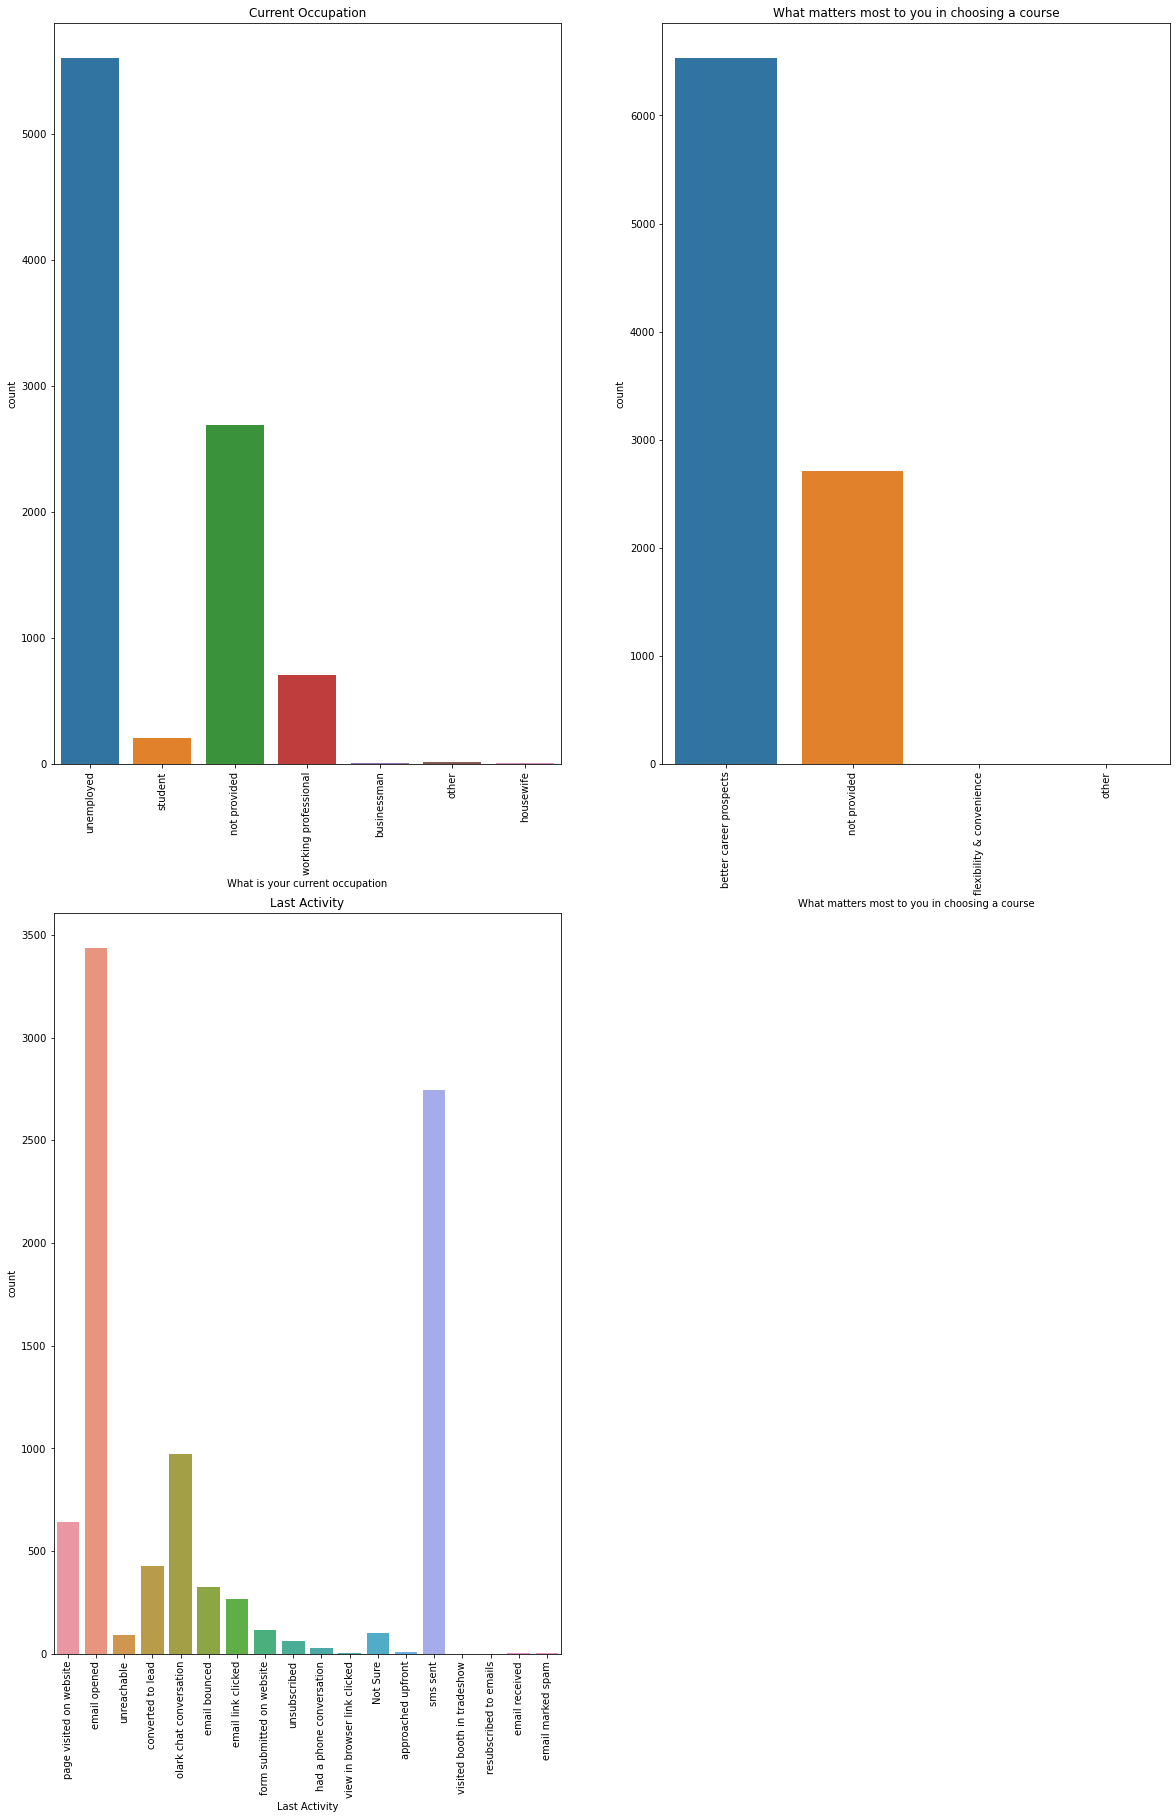

In [30]:
plt.figure(figsize = (20,30))

plt.subplot(2,2,1)
sns.countplot(df2['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,2)
sns.countplot(df2['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,3)
sns.countplot(df2['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

#### Insights

- Major last activity was email opened
- Most of the people are unemployed if we talk about profession
- Most of the people consider better career prospects as their motivation for pursuing this course 

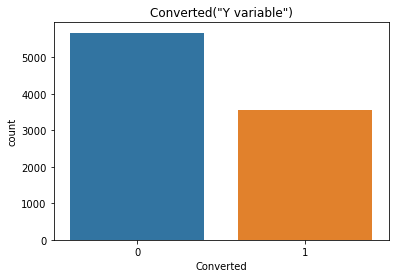

In [31]:
sns.countplot(df2['Converted'])
plt.title('Converted("Y variable")')
plt.show()

### Univariate Analysis of Numerical Columns

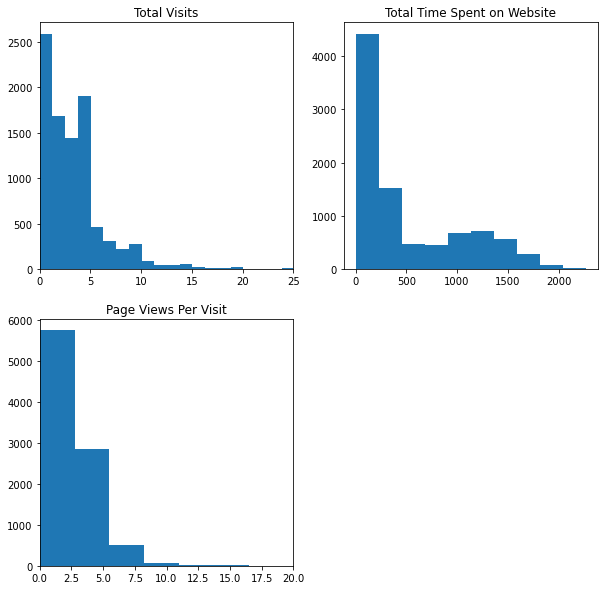

In [32]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df2['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df2['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df2['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### Relating all the categorical variables to Converted column

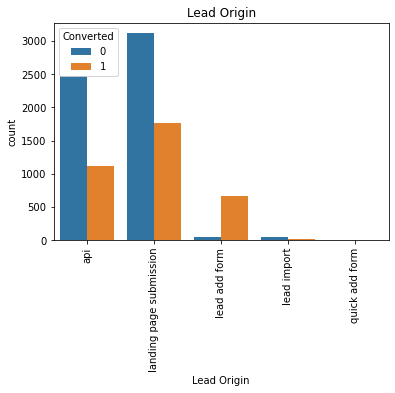

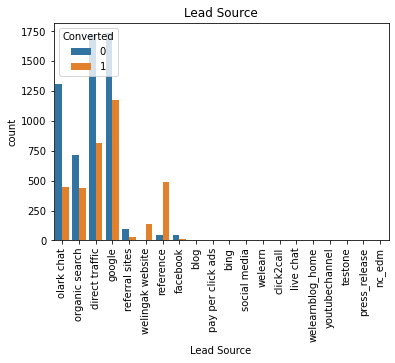

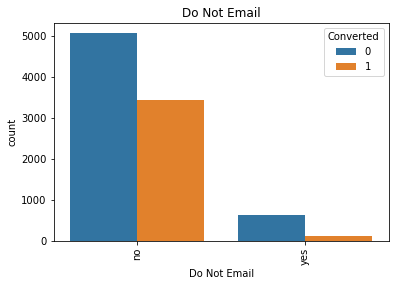

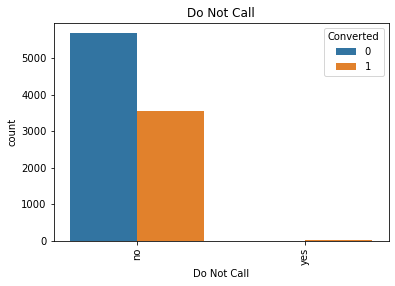

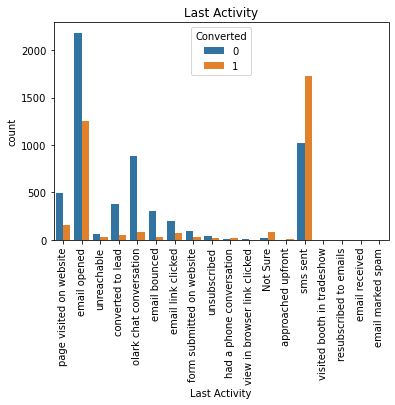

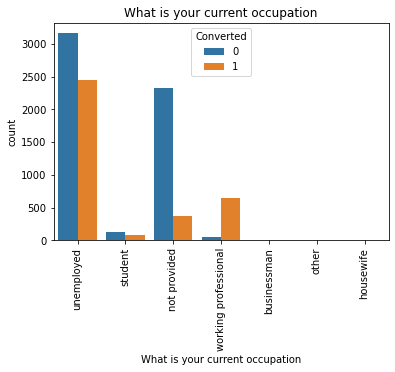

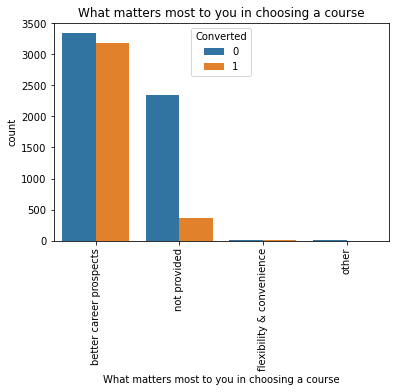

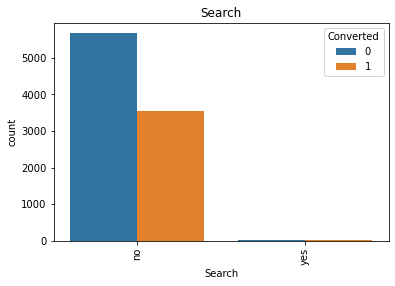

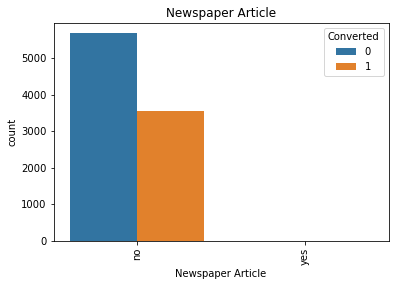

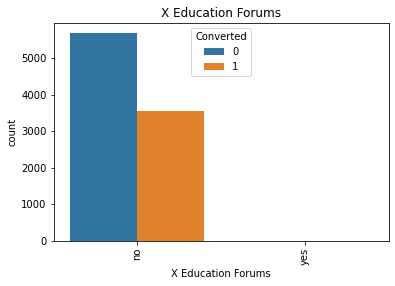

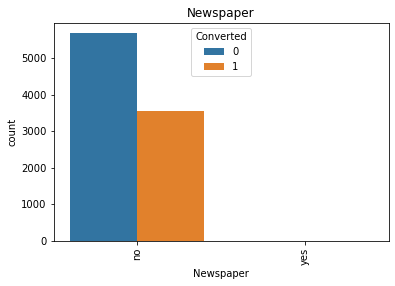

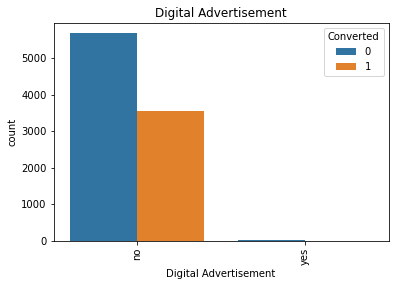

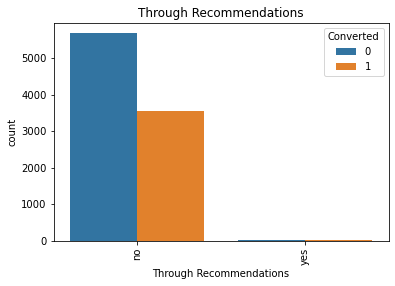

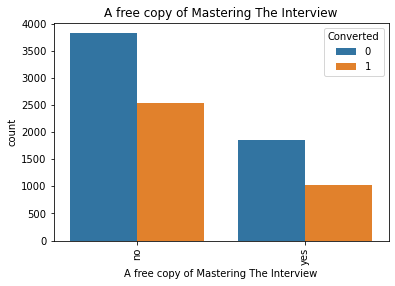

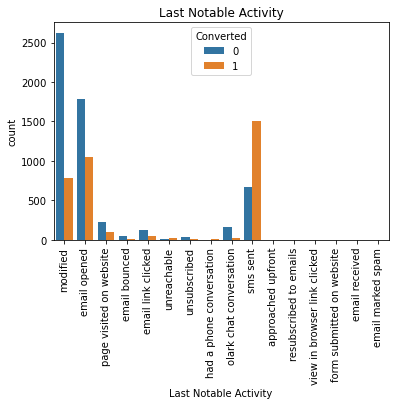

In [33]:
a = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview', 'Last Notable Activity']

for i in a:
    sns.countplot(x=i, hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
    plt.title(i)
    plt.show()
    


#### Insights

- SMS sent as last activity has higher conversion rate
- Unemployed people mostly took this course
- When lead source was google, then most of the people converted

#### Checking correlation among the variables

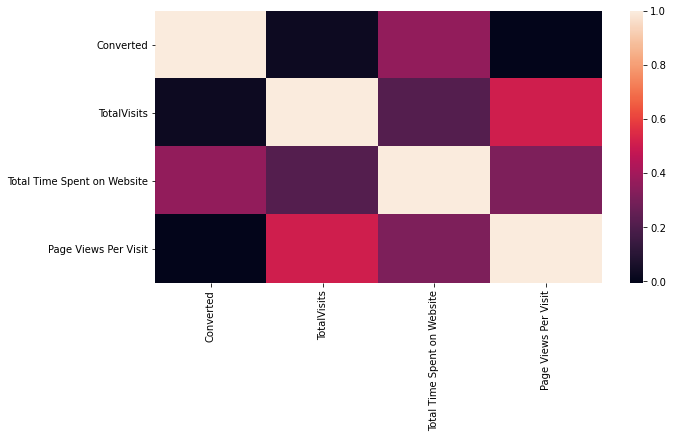

In [34]:
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr())
plt.show()

### Creating dummy variables

In [35]:
df2.loc[:, df2.dtypes == 'object'].columns


Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [36]:
dummy = pd.get_dummies(df2[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final_dum = pd.concat([df2, dummy], axis=1)
df_final_dum.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Do Not Call_yes,Last Activity_approached upfront,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_housewife,What is your current occupation_not provided,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_not provided,What matters most to you in choosing a course_other,Search_yes,Newspaper Article_yes,X Education Forums_yes,Newspaper_yes,Digital Advertisement_yes,Through Recommendations_yes,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,unemployed,better career prospects,no,no,no,no,no,no,no,modified,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.5,email opened,unemployed,better career prospects,no,no,no,no,no,no,no,email opened,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,student,better career prospects,no,no,no,no,no,no,yes,email opened,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,unemployed,better career prospects,no,no,no,no,no,no,no,modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,unemployed,better career prospects,no,no,no,no,no,no,no,modified

In [37]:
df_final_dum = df_final_dum.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_final_dum.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Do Not Call_yes,Last Activity_approached upfront,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_housewife,What is your current occupation_not provided,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_not provided,What matters most to you in choosing a course_other,Search_yes,Newspaper Article_yes,X Education Forums_yes,Newspaper_yes,Digital Advertisement_yes,Through Recommendations_yes,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [38]:
df_final_dum.shape

(9240, 77)

### Test-Train Split

In [39]:
from sklearn.model_selection import train_test_split


In [40]:
X = df_final_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Do Not Call_yes,Last Activity_approached upfront,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_housewife,What is your current occupation_not provided,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_not provided,What matters most to you in choosing a course_other,Search_yes,Newspaper Article_yes,X Education Forums_yes,Newspaper_yes,Digital Advertisement_yes,Through Recommendations_yes,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [41]:
# Putting the target variable in y
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [42]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

### Scaling the numerical features

In [43]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Do Not Call_yes,Last Activity_approached upfront,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_housewife,What is your current occupation_not provided,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_not provided,What matters most to you in choosing a course_other,Search_yes,Newspaper Article_yes,X Education Forums_yes,Newspaper_yes,Digital Advertisement_yes,Through Recommendations_yes,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3112,0.007968,0.182867,0.083333,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8413,0.019920,0.679538,0.208333,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2961,0.011952,0.553928,0.041667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
24,0.023904,0.504660,0.062500,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2740,0.011952,0.445184,0.125000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


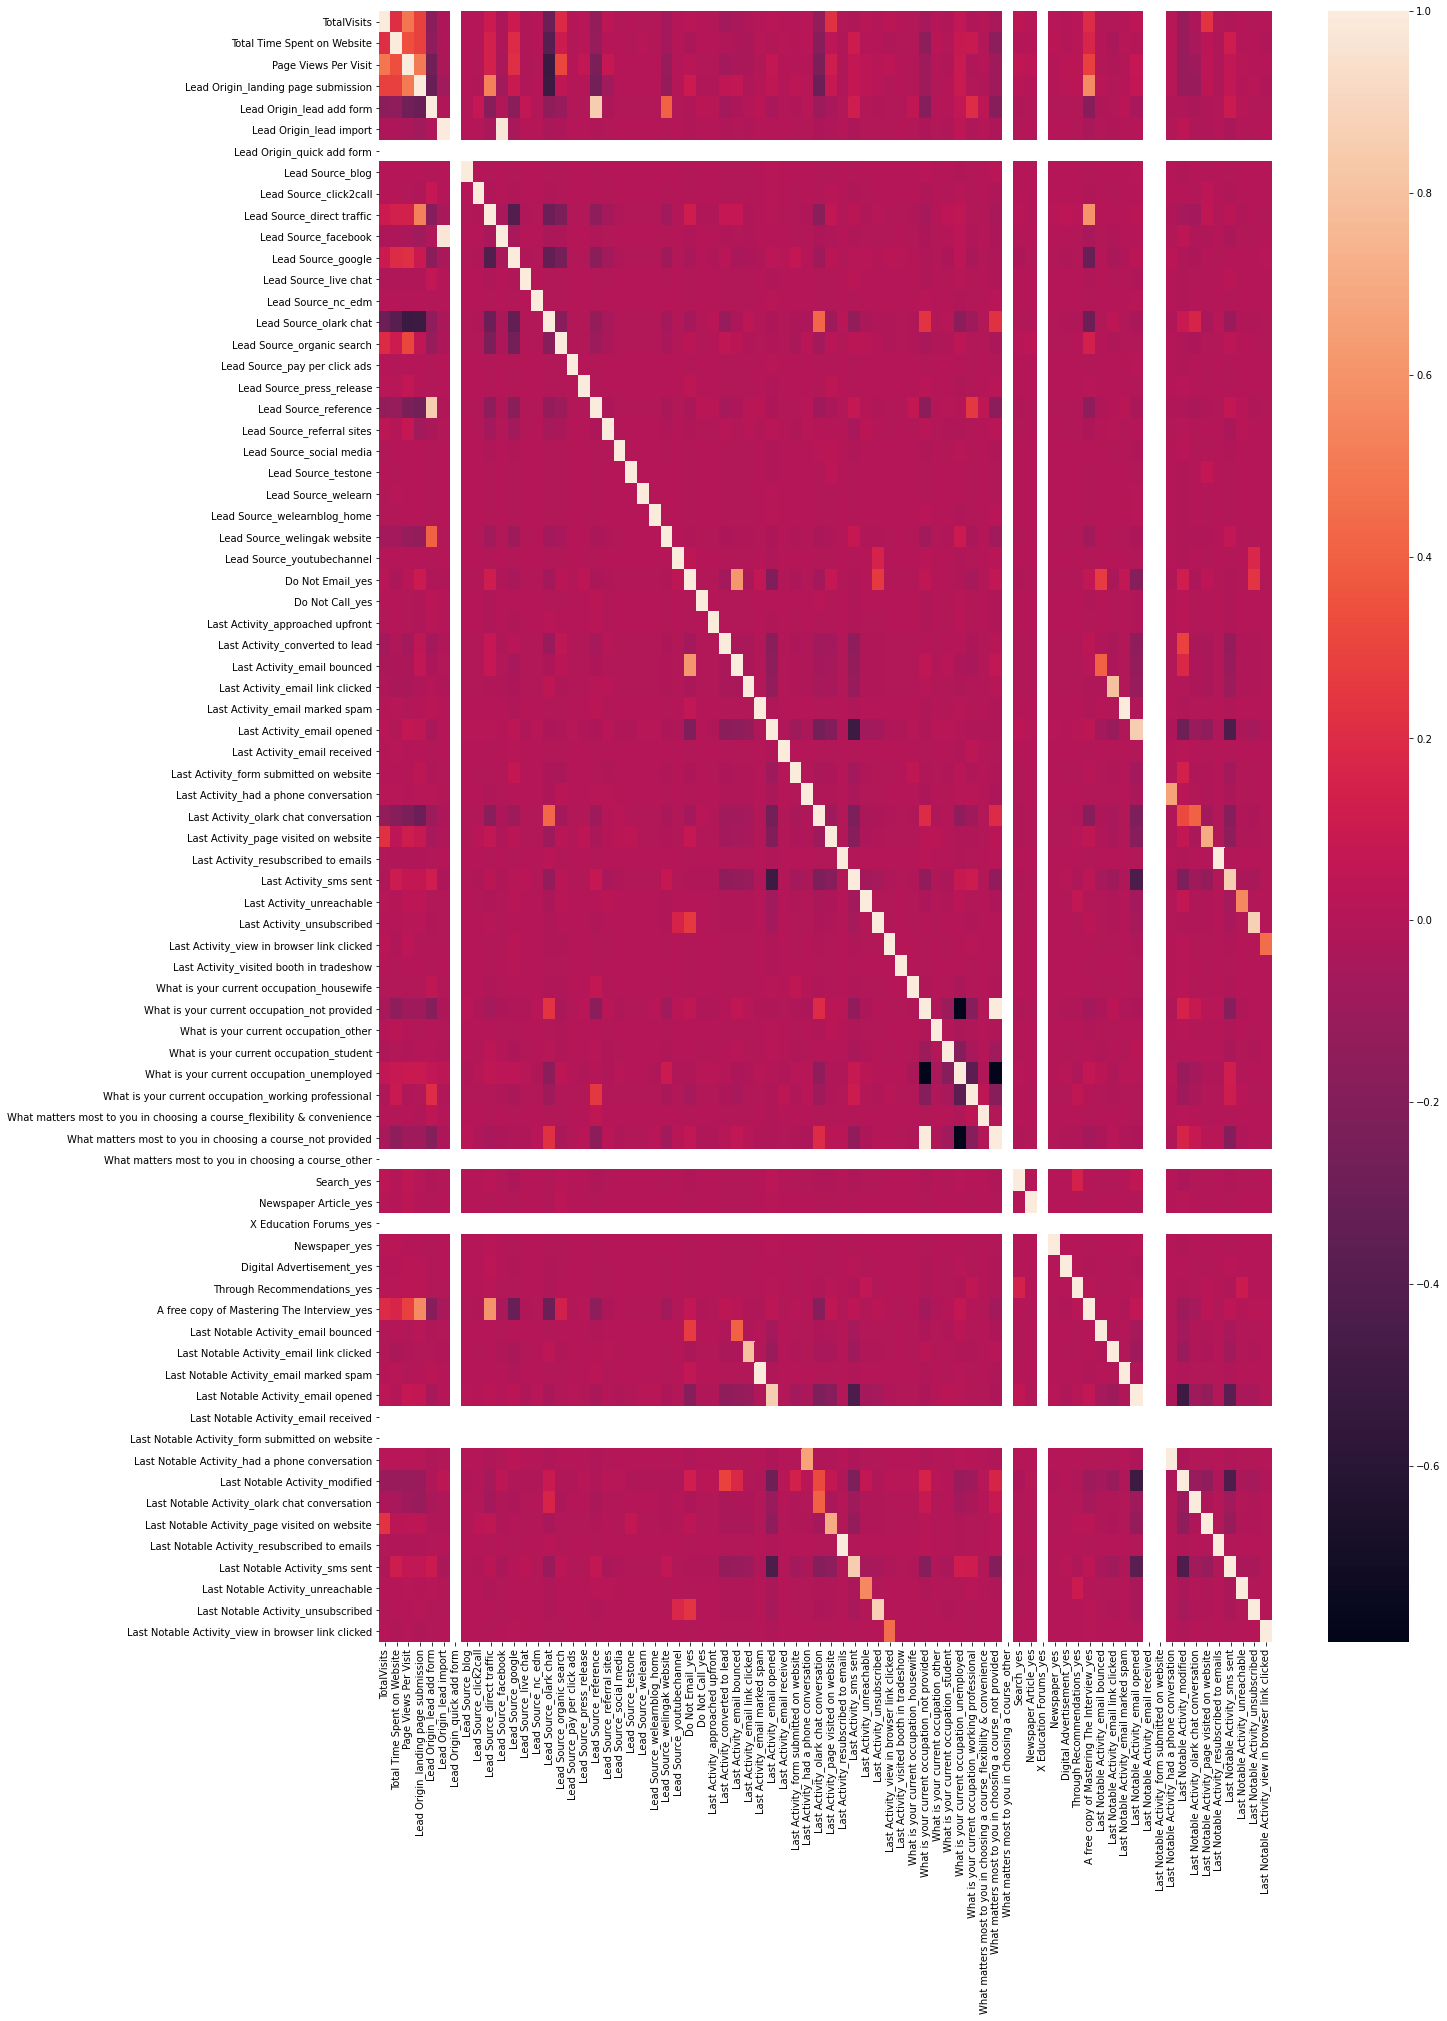

In [44]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()


### Model Building

In [45]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [46]:
# Import RFE

from sklearn.feature_selection import RFE


In [47]:
# Running RFE with 15 variables as output

rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)


In [48]:
# Features selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_landing page submission', False, 32),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 52),
 ('Lead Origin_quick add form', False, 60),
 ('Lead Source_blog', False, 41),
 ('Lead Source_click2call', False, 12),
 ('Lead Source_direct traffic', False, 29),
 ('Lead Source_facebook', False, 39),
 ('Lead Source_google', False, 42),
 ('Lead Source_live chat', False, 45),
 ('Lead Source_nc_edm', False, 8),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 36),
 ('Lead Source_pay per click ads', False, 40),
 ('Lead Source_press_release', False, 51),
 ('Lead Source_reference', False, 56),
 ('Lead Source_referral sites', False, 31),
 ('Lead Source_social media', False, 11),
 ('Lead Source_testone', False, 38),
 ('Lead Source_welearn', False, 30),
 ('Lead Source_welearnblog_home', False, 44),
 ('Lead Source_welingak website

In [49]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [50]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [51]:
# Importing statsmodels
import statsmodels.api as sm


In [52]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2630.2
Date:                Mon, 11 Jan 2021   Deviance:                       5260.4
Time:                        05:54:55   Pearson chi2:                 6.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -2.2715      0.084    -27.184      0.000      -2.435      -2.108
TotalVisits                                                                 6.2506      2.064      3.029      0.002       2.205      10.296
Total Time Spent on Website                                                 4.5581      0.166     27.527      0.000       4.234       4.883
Lead Origin_lead add form                                                   3.6666      0.202     18.187      0.000       3.271       4.062
Lead Source_olark chat                                                      1.4500      0.111     13.098      0.000       1.233       1.667
Lead Source_welingak website                                                2.4203      1.029      2.352      0.019       0.404       4.437
Do Not Email_yes                                                           -1.5034      0.167     -9.011      0.000      -1.830      -1.176
Last Activity_approached upfront                                           22.5312   2.05e+04      0.001      0.999   -4.02e+04    4.03e+04
Last Activity_olark chat conversation                                      -1.1396      0.159     -7.156      0.000      -1.452      -0.827
Last Activity_sms sent                                                      1.3716      0.075     18.364      0.000       1.225       1.518
What is your current occupation_housewife                                  22.1893   1.89e+04      0.001      0.999    -3.7e+04     3.7e+04
What is your current occupation_working professional                        2.5544      0.186     13.728      0.000       2.190       2.919
What matters most to you in choosing a course_flexibility & convenience   -27.1526   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
What matters most to you in choosing a course_not provided                 -1.2953      0.087    -14.816      0.000      -1.467      -1.124
Last Notable Activity_had a phone conversation                              3.2576      1.172      2.779      0.005       0.960       5.555
Last Notable Activity_unreachable                                           2.6295      0.695      3.784      0.000       1.268       3.991
===========================================================================================================================================
"""

In [53]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [54]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.61
3,Lead Source_olark chat,1.55
0,TotalVisits,1.41
7,Last Activity_olark chat conversation,1.41
12,What matters most to you in choosing a course_...,1.41
8,Last Activity_sms sent,1.40
2,Lead Origin_lead add form,1.39
4,Lead Source_welingak website,1.24
10,What is your current occupation_working profes...,1.20
5,Do Not Email_yes,1.07


#### Dropping coulmn with very high p value

In [55]:
X_train.drop('What matters most to you in choosing a course_flexibility & convenience', axis = 1, inplace = True)


In [56]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2634.8
Date:                Mon, 11 Jan 2021   Deviance:                       5269.6
Time:                        05:54:57   Pearson chi2:                 6.85e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.2684      0.083    -27.178      0.000      -2.432      -2.105
TotalVisits                                                    6.2015      2.060      3.010      0.003       2.164      10.239
Total Time Spent on Website                                    4.5544      0.165     27.525      0.000       4.230       4.879
Lead Origin_lead add form                                      3.6300      0.199     18.196      0.000       3.239       4.021
Lead Source_olark chat                                         1.4478      0.111     13.087      0.000       1.231       1.665
Lead Source_welingak website                                   2.4529      1.029      2.385      0.017       0.437       4.469
Do Not Email_yes                                              -1.4991      0.166     -9.005      0.000      -1.825      -1.173
Last Activity_approached upfront                              22.5326   2.06e+04      0.001      0.999   -4.03e+04    4.03e+04
Last Activity_olark chat conversation                         -1.1384      0.159     -7.154      0.000      -1.450      -0.826
Last Activity_sms sent                                         1.3721      0.075     18.388      0.000       1.226       1.518
What is your current occupation_housewife                     22.1958   1.89e+04      0.001      0.999    -3.7e+04    3.71e+04
What is your current occupation_working professional           2.5219      0.184     13.690      0.000       2.161       2.883
What matters most to you in choosing a course_not provided    -1.2965      0.087    -14.831      0.000      -1.468      -1.125
Last Notable Activity_had a phone conversation                 3.2566      1.172      2.778      0.005       0.959       5.554
Last Notable Activity_unreachable                              2.6299      0.694      3.787      0.000       1.269       3.991
==============================================================================================================================
"""

In [57]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.61
3,Lead Source_olark chat,1.55
0,TotalVisits,1.41
7,Last Activity_olark chat conversation,1.41
11,What matters most to you in choosing a course_...,1.41
8,Last Activity_sms sent,1.40
2,Lead Origin_lead add form,1.39
4,Lead Source_welingak website,1.24
10,What is your current occupation_working profes...,1.20
5,Do Not Email_yes,1.07


#### Dropping coulmn with p value > 0.05

In [58]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)


In [59]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2637.4
Date:                Mon, 11 Jan 2021   Deviance:                       5274.9
Time:                        05:54:57   Pearson chi2:                 6.86e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.2640      0.083    -27.159      0.000      -2.427      -2.101
TotalVisits                                                    6.1654      2.058      2.996      0.003       2.132      10.199
Total Time Spent on Website                                    4.5550      0.165     27.530      0.000       4.231       4.879
Lead Origin_lead add form                                      3.6421      0.199     18.282      0.000       3.252       4.033
Lead Source_olark chat                                         1.4455      0.111     13.072      0.000       1.229       1.662
Lead Source_welingak website                                   2.4381      1.028      2.371      0.018       0.422       4.454
Do Not Email_yes                                              -1.5019      0.167     -9.019      0.000      -1.828      -1.176
Last Activity_approached upfront                              21.5277   1.25e+04      0.002      0.999   -2.44e+04    2.44e+04
Last Activity_olark chat conversation                         -1.1405      0.159     -7.167      0.000      -1.452      -0.829
Last Activity_sms sent                                         1.3688      0.075     18.348      0.000       1.223       1.515
What is your current occupation_working professional           2.5188      0.184     13.673      0.000       2.158       2.880
What matters most to you in choosing a course_not provided    -1.2982      0.087    -14.854      0.000      -1.470      -1.127
Last Notable Activity_had a phone conversation                 3.2535      1.172      2.775      0.006       0.956       5.551
Last Notable Activity_unreachable                              2.6268      0.695      3.782      0.000       1.266       3.988
==============================================================================================================================
"""

In [60]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.61
3,Lead Source_olark chat,1.55
0,TotalVisits,1.41
7,Last Activity_olark chat conversation,1.41
10,What matters most to you in choosing a course_...,1.41
8,Last Activity_sms sent,1.40
2,Lead Origin_lead add form,1.38
4,Lead Source_welingak website,1.24
9,What is your current occupation_working profes...,1.19
5,Do Not Email_yes,1.07


#### Dropping coulmn with p value > 0.05 due to its insignificance in the model 

In [61]:
X_train.drop('Last Activity_approached upfront', axis = 1, inplace = True)


In [62]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2640.4
Date:                Mon, 11 Jan 2021   Deviance:                       5280.8
Time:                        05:54:58   Pearson chi2:                 6.87e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.2616      0.083    -27.143      0.000      -2.425      -2.098
TotalVisits                                                    6.1553      2.057      2.992      0.003       2.123      10.188
Total Time Spent on Website                                    4.5572      0.165     27.543      0.000       4.233       4.882
Lead Origin_lead add form                                      3.6425      0.199     18.291      0.000       3.252       4.033
Lead Source_olark chat                                         1.4553      0.110     13.177      0.000       1.239       1.672
Lead Source_welingak website                                   2.4367      1.028      2.369      0.018       0.421       4.452
Do Not Email_yes                                              -1.5033      0.167     -9.029      0.000      -1.830      -1.177
Last Activity_olark chat conversation                         -1.1483      0.159     -7.219      0.000      -1.460      -0.836
Last Activity_sms sent                                         1.3654      0.075     18.310      0.000       1.219       1.512
What is your current occupation_working professional           2.5161      0.184     13.658      0.000       2.155       2.877
What matters most to you in choosing a course_not provided    -1.3020      0.087    -14.902      0.000      -1.473      -1.131
Last Notable Activity_had a phone conversation                 3.2522      1.173      2.773      0.006       0.954       5.551
Last Notable Activity_unreachable                              2.6247      0.695      3.778      0.000       1.263       3.986
==============================================================================================================================
"""

In [63]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.61
3,Lead Source_olark chat,1.54
0,TotalVisits,1.41
6,Last Activity_olark chat conversation,1.41
9,What matters most to you in choosing a course_...,1.41
7,Last Activity_sms sent,1.40
2,Lead Origin_lead add form,1.38
4,Lead Source_welingak website,1.24
8,What is your current occupation_working profes...,1.19
5,Do Not Email_yes,1.07


#### Final Model building consists of 12 independent variables; all significant and VIF < 2

### Creating Prediction

In [64]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3112    0.201146
8413    0.910789
2961    0.981637
24      0.546225
2740    0.460287
489     0.124067
9116    0.636276
4176    0.235660
8537    0.665537
6267    0.134697
dtype: float64

In [65]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20114622, 0.91078927, 0.98163715, 0.54622504, 0.46028722,
       0.12406726, 0.63627585, 0.23566012, 0.66553733, 0.13469654])

In [66]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.201146
1,1,0.910789
2,1,0.981637
3,1,0.546225
4,0,0.460287


In [67]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.201146,0
1,1,0.910789,1
2,1,0.981637,1
3,1,0.546225,1
4,0,0.460287,0


### Model Evaluation

In [68]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [69]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3499,  455],
       [ 745, 1769]])

In [70]:
# Predicted     not_churn    churn
# Actual
# not_churn        3499       455
# churn             745      1769

In [71]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8144712430426716

In [72]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [73]:
# Calculating the sensitivity
TP/(TP+FN)

0.7036595067621321

In [74]:
# Calculating the specificity
TN/(TN+FP)

0.8849266565503288

### Optimise Cut off (ROC Curve)

##### The previous cut off was randomly selected. Now to find the optimum one


In [75]:

# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [76]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )



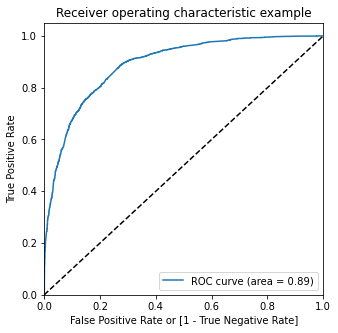

In [77]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [78]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.201146,0,1,1,1,0,0,0,0,0,0,0
1,1,0.910789,1,1,1,1,1,1,1,1,1,1,1
2,1,0.981637,1,1,1,1,1,1,1,1,1,1,1
3,1,0.546225,1,1,1,1,1,1,1,0,0,0,0
4,0,0.460287,0,1,1,1,1,1,0,0,0,0,0


In [79]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.388683,1.000000,0.000000
0.1,0.1,0.583179,0.987271,0.326252
0.2,0.2,0.765306,0.914479,0.670460
0.3,0.3,0.790043,0.877088,0.734699
0.4,0.4,0.810142,0.772076,0.834345
0.5,0.5,0.814471,0.703660,0.884927
0.6,0.6,0.806741,0.635640,0.915529
0.7,0.7,0.782004,0.523866,0.946131
0.8,0.8,0.748299,0.400557,0.969398
0.9,0.9,0.715832,0.287589,0.988113


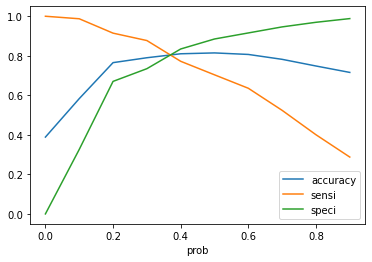

In [80]:
# Plotting above values
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [81]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.201146,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.910789,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.981637,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.546225,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.460287,0,1,1,1,1,1,0,0,0,0,0,1


In [82]:
# Checking the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.801638837353123

In [83]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3168,  786],
       [ 497, 2017]])

In [84]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [85]:
# Calculating the sensitivity
TP/(TP+FN)

0.8023070803500397

In [86]:
# Calculating the specificity
TN/(TN+FP)

0.8012139605462822

#### After optimizing, we are getting following metrics as per cutoff 0.35

- Overall Accuracy -> 0.8016
- Sensitivity      -> 0.8023
- Specificity      -> 0.8012

### Prediction on Test Set as per cutoff 0.35

In [87]:

# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])



In [88]:
# Substituting all the columns in the final train model
col = X_train.columns

In [89]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_working professional,What matters most to you in choosing a course_not provided,Last Notable Activity_had a phone conversation,Last Notable Activity_unreachable
567,1.0,0.015936,0.147359,0,0,0,0,0,0,0,0,0,0
2303,1.0,0.007968,0.688859,0,0,0,0,0,0,0,0,0,0
1523,1.0,0.011952,0.596538,0,0,0,0,0,0,0,0,0,0
6923,1.0,0.019920,0.083000,0,0,0,0,0,0,0,0,0,0
7841,1.0,0.007968,0.311585,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9124,1.0,0.007968,0.118065,0,0,0,0,0,1,0,1,0,0
1049,1.0,0.031873,0.703506,0,0,0,0,0,0,0,0,0,0
7778,1.0,0.007968,0.135375,0,0,0,0,0,0,0,0,0,0
6432,1.0,0.000000,0.000000,0,1,0,0,0,1,0,0,0,0


In [90]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.183634
1,0,0.716420
2,0,0.629615
3,0,0.146704
4,0,0.311621


In [91]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.183634,0
1,0,0.716420,1
2,0,0.629615,1
3,0,0.146704,0
4,0,0.311621,0
...,...,...,...
2767,0,0.166446,0
2768,0,0.757801,1
2769,0,0.168601,0
2770,0,0.636276,1


In [92]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8116883116883117

In [93]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1403,  322],
       [ 200,  847]])

In [94]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [95]:
# Calculating the sensitivity
TP/(TP+FN)

0.8089780324737345

In [96]:
# Calculating the specificity
TN/(TN+FP)

0.8133333333333334

#### We are getting following metrics as per cutoff 0.35 on Test Set

- Overall Accuracy -> 0.8116
- Sensitivity      -> 0.8089
- Specificity      -> 0.8133

### Calculating Precision & Recall

In [97]:
#Precision - Recall

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion


array([[3499,  455],
       [ 745, 1769]])

In [98]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7954136690647482

In [99]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7036595067621321

#### Precision and Recall Trade-off

In [100]:
#Precision-Recall Tradeoff

from sklearn.metrics import precision_recall_curve


In [101]:
y_train_pred_final.Converted, y_train_pred_final.Predicted


(0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6463    0
 6464    1
 6465    1
 6466    0
 6467    1
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6463    0
 6464    0
 6465    0
 6466    0
 6467    1
 Name: Predicted, Length: 6468, dtype: int64)

In [102]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


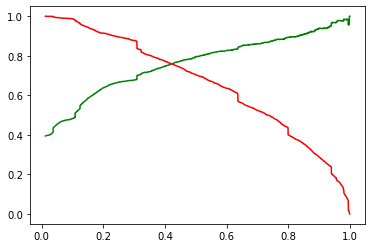

In [103]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Selecting cutoff 0.41 as per Precisiin-Recall Trade-off curve

In [104]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.201146,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.910789,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.981637,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.546225,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.460287,0,1,1,1,1,1,0,0,0,0,0,1


In [105]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8109152752009895

In [106]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3319,  635],
       [ 588, 1926]])

In [107]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [108]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7520499804763764

In [109]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.766109785202864

### Prediction on Test Set as per cutoff 0.41


In [110]:

# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()


,Converted,Conversion_Prob
0,0,0.183634
1,0,0.716420
2,0,0.629615
3,0,0.146704
4,0,0.311621


In [111]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.183634,0
1,0,0.716420,1
2,0,0.629615,1
3,0,0.146704,0
4,0,0.311621,0
...,...,...,...
2767,0,0.166446,0
2768,0,0.757801,1
2769,0,0.168601,0
2770,0,0.636276,1


In [112]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8127705627705628

In [113]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1448,  277],
       [ 242,  805]])

In [114]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [115]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.743992606284658

In [116]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7688634192932188

In [118]:
# Calculating the specificity
TN / (TN+FP)

0.8394202898550724

#### We are getting following metrics as per cutoff 0.41 on Test Set

- Overall Accuracy -> 0.8127
- Specificity      -> 0.8394

- Precision        -> 0.7439
- Recall           -> 0.7688

### Result

It was found that the variables that mattered the most in the potential buyers are :

- The total time spent on the Website.
- Total number of visits.
- When the lead source was:
  a) Olark chat
  b) Welingak website
- When the last activity was:
  a) SMS
  b) Olark chat conversation
- When the lead origin is Lead add format.
- When their current occupation is as a working professional.

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.